In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# read all csv files in the tests/third_results/whole-dataset directory
def read_csv_files(directory):
    import os
    import glob

    # Create a list to hold DataFrames
    dataframes = pd.DataFrame()

    # Use glob to find all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory, '*metrics.csv'))

    # Read each CSV file and append the DataFrame to the list
    for file in csv_files:
        df = pd.read_csv(file)
        print(file)
        df['model'] = file.split('-few')[0].split('dataset/')[1]  # Extract model name from file path
        # extract the pattern "edital-\d+" from the file name
        df['file'] = file.split('split-')[1].removesuffix('-metrics.csv')
        
        dataframes = pd.concat([dataframes, df], ignore_index=True)

    return dataframes

In [68]:
df = read_csv_files('../tests/third-results/whole-dataset')

../tests/third-results/whole-dataset/llama3.1-few-shot-reranker-bertimbau-semantic-split-edital-9-metrics.csv
../tests/third-results/whole-dataset/llama3.1-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/third-results/whole-dataset/sabia-3.1-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/third-results/whole-dataset/phi3:medium-few-shot-reranker-bertimbau-semantic-split-edital-9-metrics.csv
../tests/third-results/whole-dataset/phi3:medium-few-shot-reranker-bertimbau-semantic-split-edital-70-metrics.csv
../tests/third-results/whole-dataset/sabia-3.1-few-shot-reranker-bertimbau-semantic-split-edital-9-metrics.csv


In [71]:
df

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy,model,file
0,Quais são as informações principais sobre o Pr...,['Etapas\nPeríodo\nPublicação e Divulgação do ...,"De acordo com o item 1.2 do edital, as informa...","['EDITAL PROAES/PROGRAD/PROPP/UFMS N° 9, DE 27...",1.0,1.000000,1.000000,0.993132,llama3.1,edital-9
1,O que é FAPESP e como isso afeta as bolsas de ...,['DISPOSIÇÕES GERAIS\n12.1. As informações pre...,Não consigo encontrar essa informação no docum...,"['EDITAL PROAES/PROGRAD/PROPP/UFMS N° 9, DE 27...",1.0,1.000000,1.000000,0.000000,llama3.1,edital-9
2,Qual é a finalidade da FUNDAÇÃO UNIVERSIDADE F...,"['EDITAL PROAES/PROGRAD/PROPP/UFMS N° 9, DE 27...",Não consigo encontrar essa informação no docum...,"['EDITAL PROAES/PROGRAD/PROPP/UFMS N° 9, DE 27...",1.0,0.888889,0.000000,0.000000,llama3.1,edital-9
3,Quais são as informações sobre as vagas dispon...,['DISPOSIÇÕES GERAIS\n12.1. As informações pre...,"De acordo com o item 3.1 do edital, ao todo se...",['Etapas\nPeríodo\nPublicação e Divulgação do ...,1.0,1.000000,1.000000,0.954845,llama3.1,edital-9
4,Quais são as informações sobre as vagas para C...,['DISPOSIÇÕES GERAIS\n12.1. As informações pre...,"De acordo com o item 3.1 do edital, as vagas p...",['Etapas\nPeríodo\nPublicação e Divulgação do ...,1.0,1.000000,0.600000,0.941858,llama3.1,edital-9
...,...,...,...,...,...,...,...,...,...,...
259,O que é o Anexo II mencionado no edital da Pro...,['Pró-Reitoria de Assuntos Estudantis - Proaes...,Não consigo encontrar essa informação no docu...,['Pró-Reitoria de Assuntos Estudantis - Proaes...,0.5,0.600000,0.000000,0.000000,sabia-3.1,edital-9
260,Quais são as orientações para a participação e...,"['c) Para doutorado, no valor de R$ 5.000,00/m...","De acordo com o item 5.3 do edital, os candid...",['Pró-Reitoria de Assuntos Estudantis - Proaes...,1.0,1.000000,1.000000,0.000000,sabia-3.1,edital-9
261,O que é Proaes?,['Pró-Reitoria de Assuntos Estudantis - Proaes...,A Proaes é a Pró-Reitoria de Assuntos Estudan...,['Pró-Reitoria de Assuntos Estudantis - Proaes...,1.0,0.125000,0.666667,0.868817,sabia-3.1,edital-9
262,Qual é a implicação do Artigo 299 do Código Pe...,['Pró-Reitoria de Assuntos Estudantis - Proaes...,O Artigo 299 do Código Penal brasileiro menci...,['Pró-Reitoria de Assuntos Estudantis - Proaes...,1.0,0.600000,0.000000,0.900983,sabia-3.1,edital-9


In [79]:
tmp = df.groupby(['model', 'file']).agg({'faithfulness':'mean', 'answer_relevancy':'mean',
                                      'context_precision':'mean', 'context_recall':'mean'}).reset_index()

In [80]:
tmp.sort_values(by=['model', 'file'], inplace=True)

In [81]:
tmp

,model,file,faithfulness,answer_relevancy,context_precision,context_recall
0,llama3.1,edital-70,0.889894,0.795416,0.978723,0.899992
1,llama3.1,edital-9,0.629486,0.664196,0.967480,0.740332
2,phi3:medium,edital-70,0.387292,0.322079,0.978723,0.886870
3,phi3:medium,edital-9,0.536906,0.498106,0.967480,0.764381
4,sabia-3.1,edital-70,0.824125,0.785380,0.978723,0.891508
5,sabia-3.1,edital-9,0.778984,0.619469,0.967480,0.728489


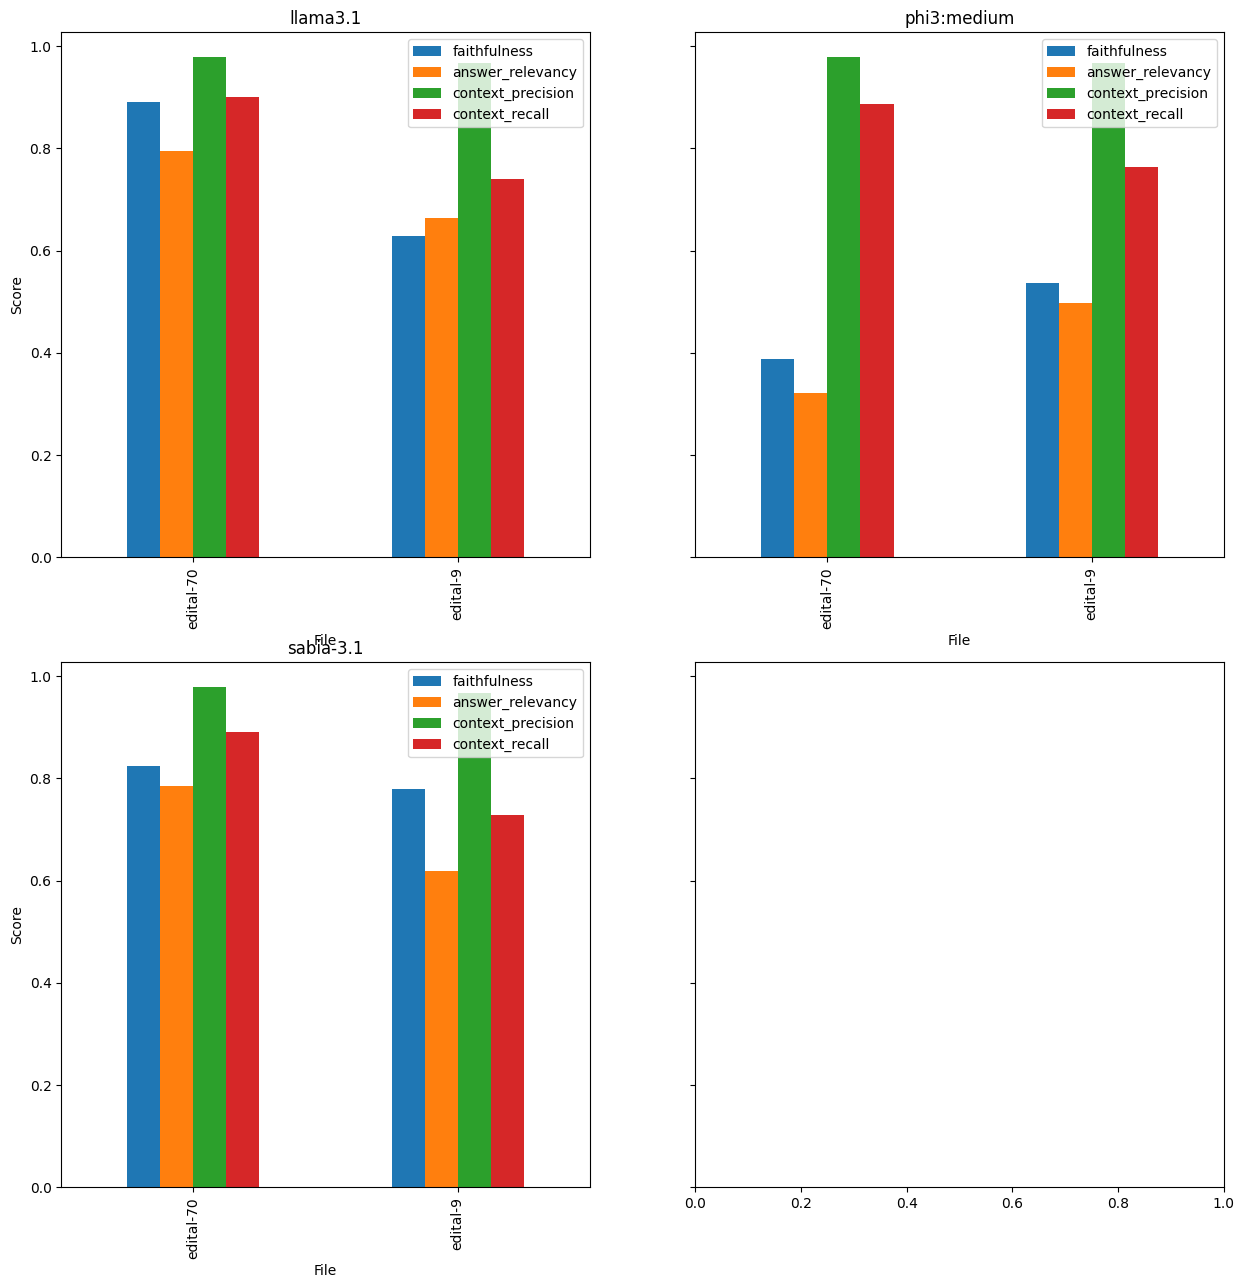

In [91]:
# create a figure with 6 subplots. One for each combination of model and file, with all the metrics displayed as bars
fig, axs = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
for i, (model, group) in enumerate(tmp.groupby('model')):
    ax = axs[i // 2, i % 2]
    group.set_index('file').plot(kind='bar', ax=ax)
    ax.set_title(model)
    ax.set_ylabel('Score')
    ax.set_xlabel('File')
    ax.legend(loc='upper right')

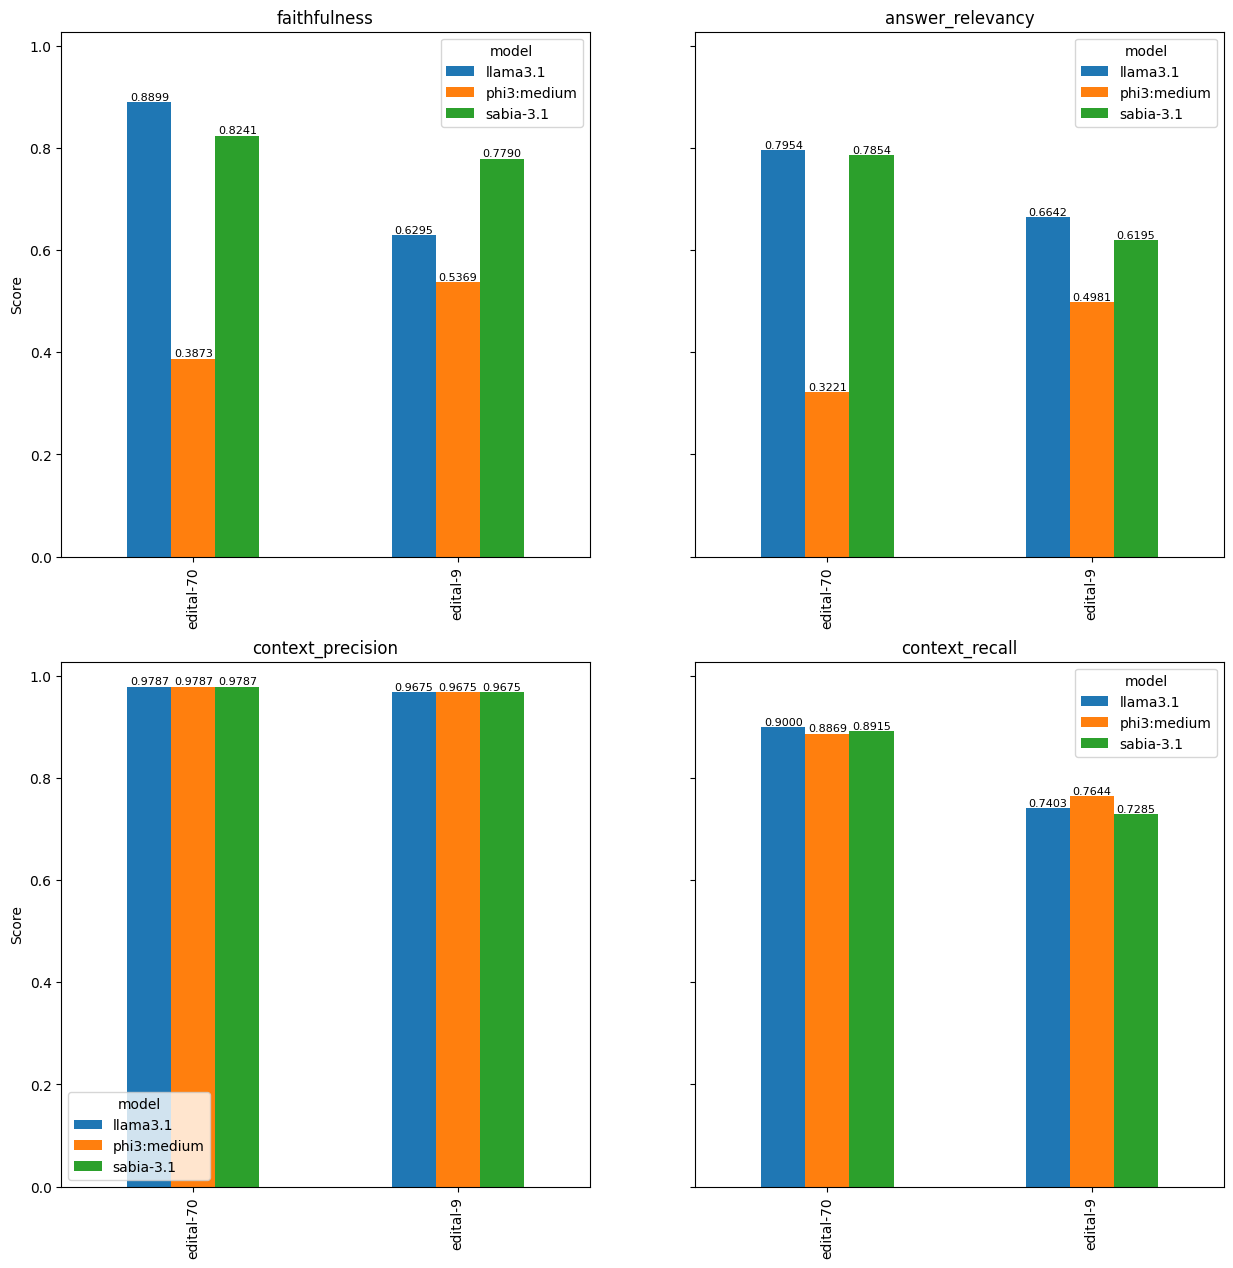

In [109]:
# create a figure with 4 subplots, one for each metric, showing the score across all models and files
fig2, axs2 = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
for i, metric in enumerate(['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']):
    ax = axs2[i // 2, i % 2]
    tmp.pivot(index='file', columns='model', values=metric).plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_ylabel('Score')
    ax.set_xlabel('')
    # ax.legend(loc='upper right')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=8)